<Figure size 1000x500 with 0 Axes>

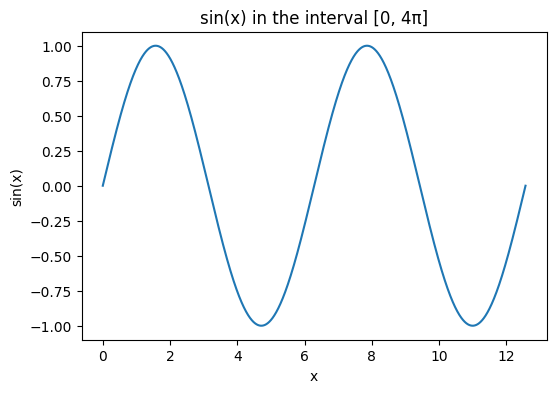

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def pastel_color(color):
    """Return a pastel shade of the given color."""
    white = np.array([1, 1, 1,1])
    return white + (color - white) * 0.9
plt.figure(figsize=(10, 5))

# Set the interval [0, 4π]
x = np.linspace(0, 4*np.pi, 5000)

# Calculate sin(x) for each value in the interval
y = np.sin(x)

# Plot the sine function
plt.figure(figsize=(6,4))
plt.plot(x, y)

# Set the plot title and axis labels

plt.title('sin(x) in the interval [0, 4π]')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Display the plot
plt.show()


In [2]:
import numpy as np

# Set the number of examples
num_examples = 100000

# Randomly sample the interval [0, 4π] to create a training set
x_train = np.random.uniform(0, 4*np.pi, size=num_examples)

# Calculate the corresponding values of sin(x) for each example in the training set
y_train = np.sin(x_train)


In [3]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(1,)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')


x_transformed = (x_train-np.mean(x_train))/np.std(x_train)
# Train the model on the training set
history = model.fit(x_transformed, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4340 - val_loss: 0.4232
Epoch 2/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4285 - val_loss: 0.4271
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4277 - val_loss: 0.4231
Epoch 4/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2514 - val_loss: 0.0224
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038 - val_loss: 2.0043e-04
Epoch 6/50
2500/2500 [==============================] - 3s 1ms/step - loss: 9.3658e-05 - val_loss: 8.6229e-05
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 4.5913e-05 - val_loss: 2.7812e-05
Epoch 8/50
2500/2500 [==============================] - 3s 1ms/step - loss: 3.6096e-05 - val_loss: 2.2524e-05
Epoch 9/50
2500/2500 [==============================] - 3s 1ms/step - loss: 3.1589e-05 - val_loss: 1.4746e-05
Epoch 10/50
2500/2500 [=======================

32/32 [==============================] - 0s 2ms/step


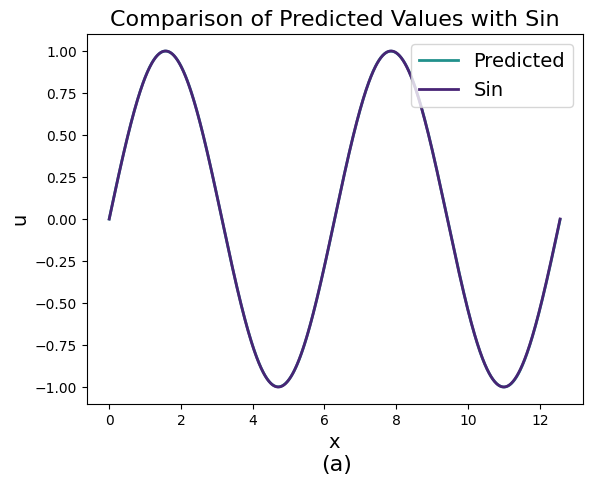

In [16]:
x_test = np.linspace(0, 4*np.pi, 1000)

# Predict the corresponding values of y using the trained model
y_pred = model.predict((x_test-np.mean(x_train))/np.std(x_train))

# Plot the lines with increased linewidth
plt.plot(x_test, y_pred, label='Predicted', color=cm.viridis(0.5), linewidth=2)
plt.plot(x_test, np.sin(x_test), label='Sin', color=cm.viridis(0.1), linewidth=2)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Set the plot title and axis labels with increased font size
plt.title('Comparison of Predicted Values with Sin', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('u', fontsize=14)

# Add subplot label "(a)" at the bottom with increased font size
plt.text(6.33, -1.5, "(a)", fontsize=16, ha='center')

# Show the plot
plt.show()

In [5]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model_inv_bad = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(1,)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with mean squared error loss and Adam optimizer
model_inv_bad.compile(loss='mse', optimizer='adam')

# Train the model on the training set
history = model_inv_bad.fit(y_train,x_train/10, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1154 - val_loss: 0.1128
Epoch 2/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1140 - val_loss: 0.1147
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1135 - val_loss: 0.1117
Epoch 4/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1129 - val_loss: 0.1119
Epoch 5/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1125 - val_loss: 0.1131
Epoch 6/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1120 - val_loss: 0.1109
Epoch 7/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1104 - val_loss: 0.1108
Epoch 8/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1088 - val_loss: 0.1078
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1081 - val_loss: 0.1072
Epoch 10/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.107

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 859us/step


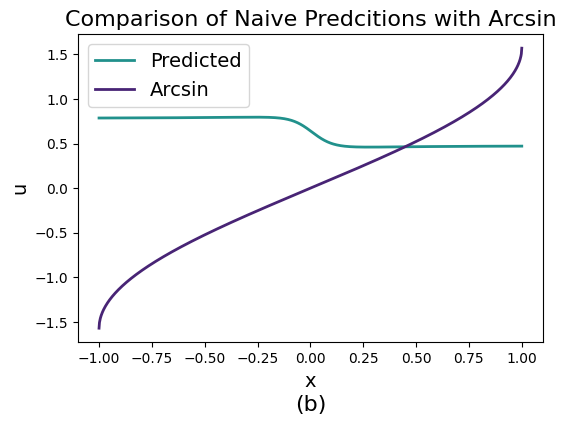

In [14]:
x_test_inv = np.linspace(-1, 1, 1000)

# Predict the corresponding values of y using the trained model
y_pred_inv = model_inv_bad.predict(x_test_inv)


plt.figure(figsize=(6,4))
# Plot the predicted values and the sin function
# Plot the predicted values and the arcsin function with increased linewidth
plt.plot(x_test_inv, y_pred_inv, label='Predicted', color=cm.viridis(0.5), linewidth=2)
plt.plot(x_test_inv, np.arcsin(x_test_inv), label='Arcsin', color=cm.viridis(0.1), linewidth=2)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Set the plot title and axis labels with increased font size
plt.title('Comparison of Naive Predcitions with Arcsin', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('u', fontsize=14)

# Add subplot label "(b)" at the bottom with increased font size
plt.text(0, -2.5, "(b)", fontsize=16, ha='center')

# Display the plot
plt.show()

In [7]:
model.trainable = False
model.trainable

False

In [8]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model_inv_prime = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(1,)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(1, activation='linear'),
    model
])

# Compile the model with mean squared error loss and Adam optimizer
model_inv_prime.compile(loss='mse', optimizer='adam')
model_inv_prime.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
 sequential (Sequential)     (None, 1)                 10401     
                                                                 
Total params: 20,802
Trainable params: 10,401
Non-trainable params: 10,401
_________________________________________________________________


In [9]:

# Train the model on the training set
history = model_inv_prime.fit(y_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


2500/2500 [==============================] - 5s 2ms/step - loss: 0.0157 - val_loss: 0.0022
Epoch 2/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 3/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 4/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 9/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 10/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0027 - val_los

32/32 [==============================] - 0s 2ms/step


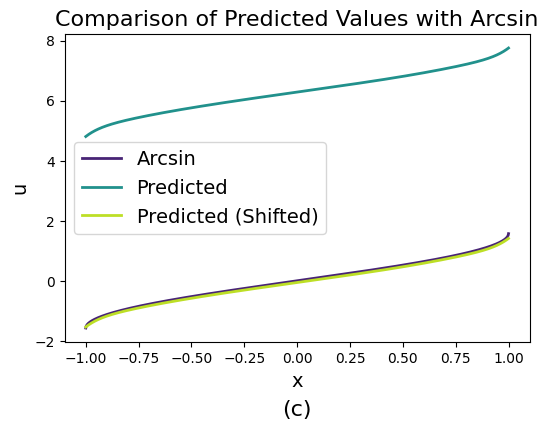

In [10]:
middle_layer_model = keras.models.Model(inputs=model_inv_prime.input, outputs=model_inv_prime.layers[2].output)

# Use the new model to predict the output of the middle layer for a set of test data points
x_test_inv = np.linspace(-1, 1, 1000)

# Predict the corresponding values of y using the trained model
y_pred_inv = middle_layer_model.predict(x_test_inv)*np.std(x_train)+np.mean(x_train)


plt.figure(figsize=(6,4))
# Plot the predicted values and the sin function

plt.plot(x_test_inv, np.arcsin(x_test_inv), label='Arcsin', color=cm.viridis(0.1), linewidth=2)
plt.plot(x_test_inv, y_pred_inv, label='Predicted', color=cm.viridis(0.5), linewidth=2)
plt.plot(x_test_inv, y_pred_inv-6.34, label='Predicted (Shifted)', color=cm.viridis(0.9), linewidth=2)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Update and set the plot title with increased font size
plt.title('Comparison of Predicted Values with Arcsin', fontsize=16)

# Set the axis labels with increased font size
plt.xlabel('x', fontsize=14)
plt.ylabel('u', fontsize=14)

# Add subplot label "(c)" at the bottom with increased font size
plt.text(0, -4.5, "(c)", fontsize=16, ha='center')

# Display the plot
plt.show()

32/32 [==============================] - 0s 868us/step


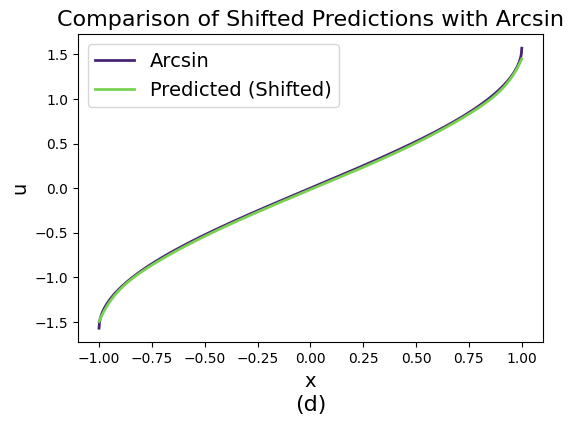

In [13]:
middle_layer_model = keras.models.Model(inputs=model_inv_prime.input, outputs=model_inv_prime.layers[2].output)

# Use the new model to predict the output of the middle layer for a set of test data points
x_test_inv = np.linspace(-1, 1, 1000)

# Predict the corresponding values of y using the trained model
y_pred_inv = middle_layer_model.predict(x_test_inv)*np.std(x_train)+np.mean(x_train)

# Plot the predicted values and the sin function
# plt.plot(x_test_inv, y_pred_inv, label='Predicted')

plt.figure(figsize=(6,4))
# plt.plot(x_test_inv, y_pred_inv, label='Predicted', color=cm.viridis(0.5))
plt.plot(x_test_inv, np.arcsin(x_test_inv), label='Arcsin', color=cm.viridis(0.1), linewidth=2)
plt.plot(x_test_inv, y_pred_inv-6.3, label='Predicted (Shifted)', color=cm.viridis(0.8), linewidth=2)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Shorten and set the plot title with increased font size
plt.title('Comparison of Shifted Predictions with Arcsin', fontsize=16)

# Set the axis labels with increased font size
plt.xlabel('x', fontsize=14)
plt.ylabel('u', fontsize=14)

# Add subplot label "(d)" at the bottom with increased font size
plt.text(0, -2.5, "(d)", fontsize=16, ha='center')

# Display the plot
plt.show()

32/32 [==============================] - 0s 1ms/step


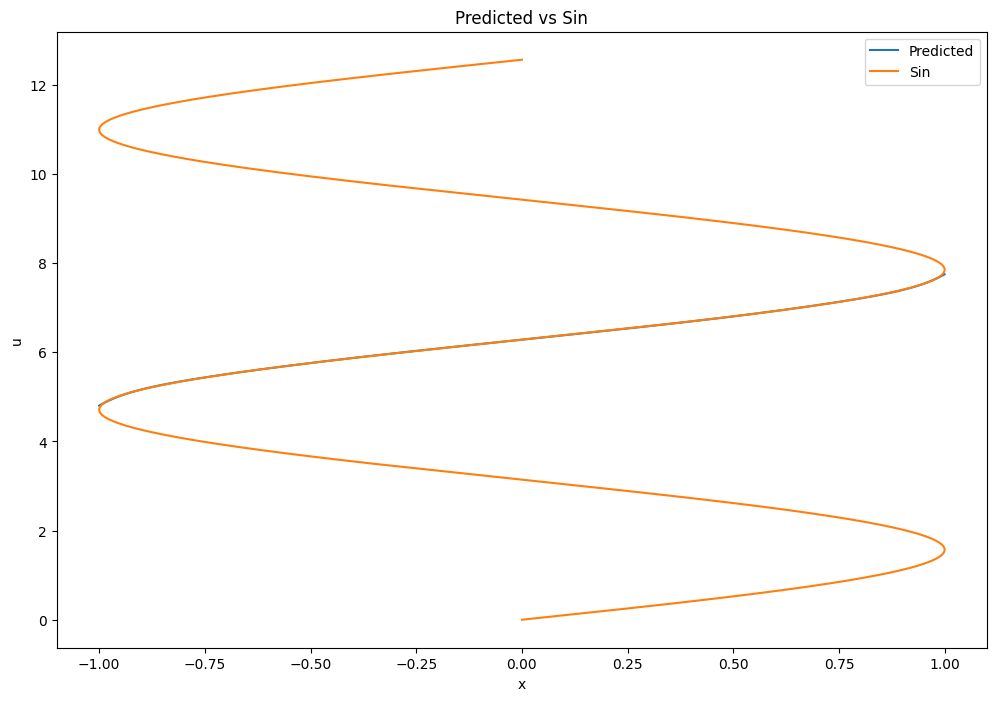

In [12]:
x_test = np.linspace(0, 4*np.pi, 1000)

# Predict the corresponding values of y using the trained model
y_pred = model.predict((x_test-np.mean(x_train))/np.std(x_train))

# Plot the predicted values and the sin function

# set figsize
plt.figure(figsize=(12,8))
# Plot the predicted values and the sin function
plt.plot(x_test_inv, y_pred_inv, label='Predicted')
plt.plot( np.sin(x_test),x_test, label='Sin')
plt.legend()

# Set the plot title and axis labels
plt.title('Predicted vs Sin')
plt.xlabel('x')
plt.ylabel('u')

# Display the plot
plt.show()